<a href="https://colab.research.google.com/github/Mgssru/Proyecto-final-IA/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from sklearn import svm, datasets, decomposition, datasets
from sklearn.metrics import matthews_corrcoef, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split


# Carga de la base de datos
data = pd.read_csv("insurance.csv", sep=",")

# Afortunadamente el dataset no tiene valores nulos en ninguna de sus columnas
# y para determinar el costo de "charges", todos los datos son perminentes

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Pasamos los valores categóricos a numéricos.

#------------------------------------------------------------------------------#
# Se procede a cambiar las variables con valores númericos para poder
# analizarlos
#----------------------------------- sex --------------------------------------#

data.loc[ data[ 'sex' ] == 'female' , 'sex' ] = '0'
data.loc[ data[ 'sex' ] == 'male' , 'sex' ] = '1'

#---------------------------------- smoker ------------------------------------#

data.loc[ data[ 'smoker' ] == 'no' , 'smoker' ] = '0'
data.loc[ data[ 'smoker' ] == 'yes' , 'smoker' ] = '1'

#---------------------------------- region ------------------------------------#

data.loc[ data[ 'region' ] == 'southwest' , 'region' ] = '0'
data.loc[ data[ 'region' ] == 'southeast' , 'region' ] = '1'
data.loc[ data[ 'region' ] == 'northwest' , 'region' ] = '2'
data.loc[ data[ 'region' ] == 'northeast' , 'region' ] = '3'

print(data)

      age sex     bmi  children smoker region      charges
0      19   0  27.900         0      1      0  16884.92400
1      18   1  33.770         1      0      1   1725.55230
2      28   1  33.000         3      0      1   4449.46200
3      33   1  22.705         0      0      2  21984.47061
4      32   1  28.880         0      0      2   3866.85520
...   ...  ..     ...       ...    ...    ...          ...
1333   50   1  30.970         3      0      2  10600.54830
1334   18   0  31.920         0      0      3   2205.98080
1335   18   0  36.850         0      0      1   1629.83350
1336   21   0  25.800         0      0      0   2007.94500
1337   61   0  29.070         0      1      2  29141.36030

[1338 rows x 7 columns]


In [ ]:
#	Creamos un archivo csv con nuestros datos limpios de tal manera que: 
# por columnas tenemos nuestras características y por filas cada muestra 
# las etiqueta(s) “Y" las tenemos en la última(s) columna(s)

# Se carga las respuestas a predecir
Y = pd.DataFrame( data , columns = [ 'smoker' ] )
print(Y)

# Los datos que si nos seran relevantes para saber si es fumador
S = pd.DataFrame( data , columns = [ 'age' , 'charges' , 'bmi' , 'children' , 
                                     'sex' , 'region' ])

print(S)

     smoker
0         1
1         0
2         0
3         0
4         0
...     ...
1333      0
1334      0
1335      0
1336      0
1337      1

[1338 rows x 1 columns]
      age      charges     bmi  children sex region
0      19  16884.92400  27.900         0   0      0
1      18   1725.55230  33.770         1   1      1
2      28   4449.46200  33.000         3   1      1
3      33  21984.47061  22.705         0   1      2
4      32   3866.85520  28.880         0   1      2
...   ...          ...     ...       ...  ..    ...
1333   50  10600.54830  30.970         3   1      2
1334   18   2205.98080  31.920         0   0      3
1335   18   1629.83350  36.850         0   0      1
1336   21   2007.94500  25.800         0   0      0
1337   61  29141.36030  29.070         0   0      2

[1338 rows x 6 columns]


In [ ]:
# Selección del método de evaluación 
  # Métodos supervisados:
    # Vamos a usar un ##% para entrenar y un ##% para validar, seleccionamos 
    # estos a partir de la cantidad de datos, de tal manera que el conjunto de 
    # validación que suele ser el más pequeño de los dos tenga por lo menos una 
    # cantidad significativa de representantes de todas las clases (10 mínimo).
print( "Tamaño del conjunto de original:      ",S.shape, Y.shape )
X_train, X_test, Y_train, Y_test = train_test_split( S, Y, test_size=0.1,
                                                    train_size=0.9, 
                                                    random_state=0 )
print( "Tamaño del Conjunto de entrenamiento: ", X_train.shape, Y_train.shape  )
print( "Tamaño del Conjunto de evaluación:    ", X_test.shape, Y_test.shape  )

Tamaño del conjunto de original:       (1338, 6) (1338, 1)
Tamaño del Conjunto de entrenamiento:  (1204, 6) (1204, 1)
Tamaño del Conjunto de evaluación:     (134, 6) (134, 1)


In [ ]:
# Normalización:
  #	Usando el conjunto de entrenamiento (o todos los datos en caso de que se 
  # esté haciendo cross-validación) normalizar usando:
    #	Los dos momentos iniciales para normalizar (standarscaler)
    #	El valor min y max (minmaxscaler).
    #	Otra técnica que el estado del arte del método implementado le recomiende 
    #   para normalizar.

scaler = MinMaxScaler()

# Proceso de normalización
scaler.fit( X_train )
Xn_t = scaler.transform( X_train )
print(Xn_t)
scaler.fit( Y_train )
Yn_t = scaler.transform( Y_train )
print(Yn_t)


  # Normalizar también el conjunto de validación con los valores obtenidos del 
  # conjunto de prueba (min, max, media, desviación, etc...)

scaler.fit( X_test )
Xn_te = scaler.transform( X_test )

scaler.fit( Y_test )
Yn_te = scaler.transform( Y_test )


[[0.52173913 0.33555696 0.37772397 0.         1.         0.        ]
 [0.34782609 0.54861228 0.3992467  0.         1.         0.        ]
 [0.52173913 0.29360083 0.23352166 0.         1.         0.33333333]
 ...
 [0.47826087 0.06853769 0.24535916 0.         1.         0.33333333]
 [0.02173913 0.00837299 0.52649987 0.         1.         0.66666667]
 [0.32608696 0.05816811 0.06833468 0.2        0.         0.        ]]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
# Componentes principales finales

pca = decomposition.PCA(n_components = 5 , whiten = True , svd_solver = 'auto')

pca.fit( Xn_t )
Xn_t = pca.transform( Xn_t )
pca.fit( Xn_te )
Xn_te = pca.transform( Xn_te )

In [ ]:
#   Maquina de soporte vectorial

# Se definen diferentes Kernel para evaluar
kernels = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]

Kernel = 0

# Se crea la maquina de soporte vectorial
msv = svm.SVC( kernel = kernels[Kernel] , gamma='auto' , random_state=895 )
msv.fit( Xn_t , Y_train )
Y_test_predicted_msv = msv.predict( Xn_te )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#     KNN

n_neighbors = 3

knn = KNeighborsClassifier( n_neighbors , weights = 'uniform' ,
                            metric = 'euclidean' , metric_params=None ,
                            algorithm='auto' )

# Entrenamiento del metodo
knn.fit( Xn_t , Y_train )

# Predicción del modelo
Y_test_predicted_knn = knn.predict( Xn_te )

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#--------------------------------REG LOG----------------------------------------
print("Regresión logística")
LR = LogisticRegression(penalty='l2',max_iter=1000, C=10000,random_state=0)
LR.fit(Xn_t, Y_train)
Y_test_predicted_LR = LR.predict( Xn_te )

Regresión logística


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# EVALUCACIÓN POR COEFICIENTE DE MATTHEWS


# Calculo del coeficiente de correlación de Matthew
MCC_msv = matthews_corrcoef( Y_test , Y_test_predicted_msv )
MCC_knn = matthews_corrcoef( Y_test , Y_test_predicted_knn )
MCC_LR = matthews_corrcoef( Y_test , Y_test_predicted_LR )


print("")
print( "Coeficiente de correlación de Matthew para MSV : " , MCC_msv )
print("")
print( "Coeficiente de correlación de Matthew para knn : " , MCC_knn )
print("")
print( "Coeficiente de correlación de Matthew para RL  : " , MCC_LR )


Coeficiente de correlación de Matthew para MSV :  -0.06308338404690432

Coeficiente de correlación de Matthew para knn :  -0.17162258504434186

Coeficiente de correlación de Matthew para RL  :  -0.054881895184391224


In [ ]:
# F1 score
from sklearn.metrics import f1_score

f1_score_msv = f1_score(Y_test, Y_test_predicted_msv, average='micro')
f1_score_knn = f1_score(Y_test, Y_test_predicted_knn, average='micro')
f1_score_LR = f1_score(Y_test, Y_test_predicted_LR, average='micro')

print("")
print( "F1 score para MSV : " , f1_score_msv )
print("")
print( "F1 score para knn : " , f1_score_knn )
print("")
print( "F1 score para RL  : " , f1_score_LR )


F1 score para MSV :  0.5522388059701493

F1 score para knn :  0.582089552238806

F1 score para RL  :  0.6194029850746269


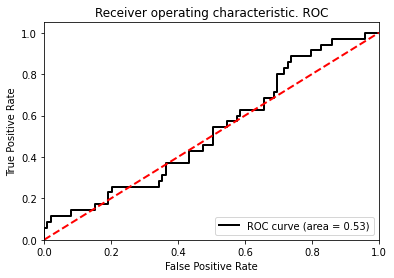

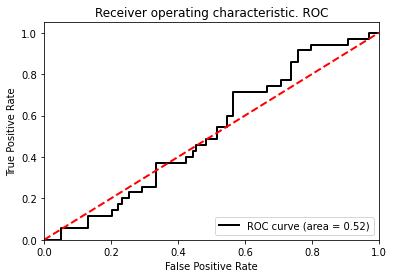

In [ ]:
# AUC-ROC

# Se calculan los resultados para ROC
Y_test_scores_msv = msv.decision_function( Xn_te )
Y_test_scores_LR = LR.decision_function( Xn_te )


# Crea los valores de la curva ROC
fpr_msv , tpr_msv , thresholds_msv = roc_curve( Yn_te , Y_test_scores_msv )
roc_auc_msv = roc_auc_score( Y_test , Y_test_scores_msv )

# Crea los valores de la curva ROC
fpr_LR , tpr_LR , thresholds_LR = roc_curve( Yn_te , Y_test_scores_LR )
roc_auc_LR = roc_auc_score( Y_test , Y_test_scores_LR )

#-------------------------------- FIGURE PLOT ---------------------------------#

plt.figure(1)
# Crea el grafico para la curva ROC
plt.plot( fpr_msv , tpr_msv , color = 'black' , lw = 2 , 
        label='ROC curve (area = %0.2f)' %roc_auc_msv)
# Crea el grafico para la linea 
plt.plot( [ 0 , 1 ] , [ 0 , 1 ] , color = 'red' , lw = 2 , linestyle = '--')
plt.xlim( [ 0.0 , 1.0 ] )
plt.ylim( [ 0.0 , 1.05 ] )
plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.title( 'Receiver operating characteristic. ROC' )
plt.legend( loc = "lower right" )


plt.figure(2)
# Crea el grafico para la curva ROC
plt.plot( fpr_LR , tpr_LR , color = 'black' , lw = 2 , 
        label='ROC curve (area = %0.2f)' %roc_auc_LR)
# Crea el grafico para la linea 
plt.plot( [ 0 , 1 ] , [ 0 , 1 ] , color = 'red' , lw = 2 , linestyle = '--')
plt.xlim( [ 0.0 , 1.0 ] )
plt.ylim( [ 0.0 , 1.05 ] )
plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.title( 'Receiver operating characteristic. ROC' )
plt.legend( loc = "lower right" )


# Muestra
plt.show()

In [ ]:
# Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Maquina de soporte vectorial

param_grid = [{ "kernel": ["rbf"], "gamma": [1e-3,1e-4], "C": [1,10,100,1000] },
              { "kernel": ["linear"], "C": [1,10,100,1000] },]

gridSearchCV_SVC = GridSearchCV( estimator = SVC(), param_grid = param_grid, cv 
                                = 3, scoring = "f1_micro", refit = True, 
                                return_train_score = False,)

# Entrenamiento grid search
gridSearchCV_SVC.fit( Xn_t , Yn_t )


# KNN

k_range = list(range(1, 30))
param_grid = { 'n_neighbors':(k_range), 'weights':['uniform', 'distance'], 
              'metric':['euclidean','manhattan'] }

gridSearchCV_knn = GridSearchCV( estimator = KNeighborsClassifier(), param_grid 
                                = param_grid, cv = 10,scoring = "f1_micro", 
                                refit = True, return_train_score = False,)

# Entrenamiento grid search
gridSearchCV_knn.fit( Xn_t , Yn_t )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro')

In [ ]:
# Mejores parametros
print(gridSearchCV_SVC.best_params_)
# Mejores parametros
print(gridSearchCV_knn.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
{'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}


In [ ]:
# COMPROBACIÓN DE LA MEJORA DE LOS HIPERPARAMETROS

# Se crea la maquina de soporte vectorial
msv = svm.SVC( C=1000, kernel = kernels[1] , gamma=0.001 , random_state=895 )

# Entrenamiento
msv.fit( Xn_t , Yn_t )

# Predicción
Y_test_predicted = msv.predict( Xn_te )


# KNN
n_neighbors = 25
knn = KNeighborsClassifier( n_neighbors , weights = 'distance' ,
                            metric = 'manhattan' , metric_params=None ,
                            algorithm='auto' )

# Entrenamiento del metodo
knn.fit( Xn_t , Yn_t )

# Predicción del modelo
Y_test_predicted_knn = knn.predict( Xn_te )

f1_score_msv = f1_score(Y_test, Y_test_predicted_msv, average='micro')
f1_score_knn = f1_score(Yn_te, Y_test_predicted_knn, average='micro')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("")
print( "F1 score para MSV : " , f1_score_msv )
print("")
print( "F1 score para knn : " , f1_score_knn )


F1 score para MSV :  0.5522388059701493

F1 score para knn :  0.6417910447761194
